# Bab 1: Introduction

Name: Mohammad Dandy Goesti

Problem Statement/Objective:   

This Project aims to create a machine learning model to predict customers who are able to make repayment are not rejected when applying for a loan, and loans are provided with a principal, maturity and repayment calendar that will motivate customers to succeed.

Predictions will try to use 3 models, namely Logistic Regression, KNN and Random Forest, where these models will be compared and the one that has the best results will be selected. Then it will also be evaluated with Precision, Recall, Accuracy score and F1 score. 

# Bab 2: Import Libraries

In [1]:
import pandas as pd

In [2]:
# Import the Library to be used in this analysis

#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn import metrics
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# Bab 3: Data Loading


At this stage, the data preparation process will be carried out before exploration and analysis continues. I will look at the information from the dataset and then I will change or delete the data according to the process required.

In [3]:
# read dataset
df_ori=pd.read_csv("application_train.csv")

# Duplicate original data
df_raw = df_ori.copy()

# Look at the first 10 data in the dataset with all columns set
pd.set_option("display.max_columns" , None)
df_raw.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# View the last 10 data in the dataset
df_raw.tail(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307501,456245,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,225000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009175,-12961,-1046,-1398.0,-3780,NaN,1,1,1,1,0,0,Low-skill Laborers,5.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Industry: type 1,NaN,0.575481,NaN,0.0392,0.0827,0.9846,NaN,NaN,0.00,0.0345,0.0417,NaN,0.0144,NaN,0.0189,NaN,0.0000,0.0399,0.0858,0.9846,NaN,NaN,0.0000,0.0345,0.0417,NaN,0.0147,NaN,0.0197,NaN,0.0000,0.0396,0.0827,0.9846,NaN,NaN,0.00,0.0345,0.0417,NaN,0.0146,NaN,0.0192,NaN,0.0000,NaN,block of flats,0.0149,"Stone, brick",No,2.0,1.0,2.0,1.0,-448.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307502,456246,0,Cash loans,F,N,Y,1,94500.0,225000.0,10620.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010966,-16063,-8736,-8672.0,-4531,NaN,1,1,1,1,0,0,Laborers,3.0,2,2,MONDAY,16,0,0,0,0,1,1,School,NaN,0.313334,0.735221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1516.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307503,456247,0,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,247500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.022800,-11870,-399,-675.0,-3936,NaN,1,1,0,1,0,1,Core staff,1.0,2,2,SATURDAY,11,0,0,0,0,0,0,Bank,0.243466,0.501221,0.609276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,3.0,9.0,2.0,-2315.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
307504,456248,0,Cas

In [5]:
# Dataset info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


The dataset has 307511 entries and 122 columns with data types object, float and int. The Target variable is 1, which means customers will be classified as people who have payment difficulties.

In [6]:
# display columns name
df_raw.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
# display shape of rows and columns
df_raw.shape

(307511, 122)

In [8]:
# Save data to new csv
df_raw.to_csv('application_train_clean.csv', index=False)
print('Data Saved')

Data Saved


In [9]:
# read dataset 
df = pd.read_csv('application_train_clean.csv')

# Bab 4: Exploratory Data Analysis (EDA)

In this section, we will explore the data, see the distribution of the data, and also find out the relationship between several variable columns in order to understand the data for further analysis.

In [10]:
total_client = df.groupby('TARGET')['CODE_GENDER'].count().reset_index()
total_client.rename(columns = {'CODE_GENDER' : 'Clients'}, inplace=True)

total_client['Percentage'] = round(total_client.Clients / total_client.Clients.sum(), 2)
total_client

,TARGET,Clients,Percentage
0,0,282686,0.92
1,1,24825,0.08


92% clienst is 0 that means they can pay the loan on time while 8% cant pay on time.

Checking GENDER distribution on TARGET

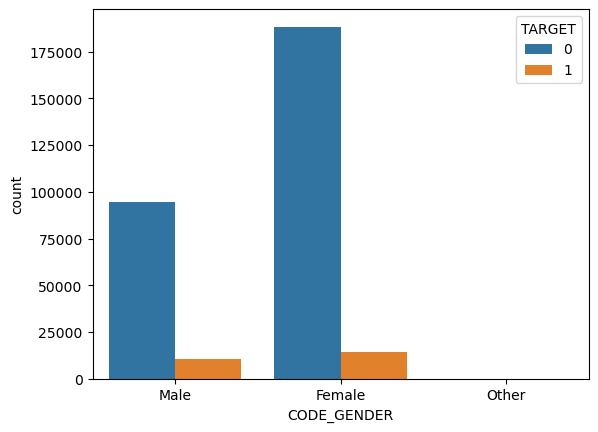

In [11]:

plot = sns.countplot(x = "CODE_GENDER", data = df, hue = "TARGET")
plot.set_xticklabels(["Male","Female","Other"]);

From the chart above we can see at a glance that the tendency for the 2 genders to cant pay the loan is smaller. Where shown in the bar for target = 0 is higher than target = 1 and also the female composition is higher than male either can pay or cant pay the loan on time

Lets see from occupations perspective

In [12]:
ot = df.groupby(['TARGET', 'OCCUPATION_TYPE'])['CODE_GENDER'].count().reset_index().sort_values(by=['OCCUPATION_TYPE', 'TARGET'])
ot.rename(columns = {'CODE_GENDER' : 'Clients'}, inplace=True)

name_of_ot = list(ot['OCCUPATION_TYPE'].unique())
percentage = []

for i in name_of_ot:
    data = ot[ot['OCCUPATION_TYPE'] == i]
    total = data['Clients'].sum()
    for x,y in enumerate(data['Clients']):
        pct = round(y / total, 2)
        percentage.append(pct)

ot['Percentage'] = percentage
ot

,TARGET,OCCUPATION_TYPE,Clients,Percentage
0,0,Accountants,9339,0.95
18,1,Accountants,474,0.05
1,0,Cleaning staff,4206,0.90
19,1,Cleaning staff,447,0.10
2,0,Cooking staff,5325,0.90
20,1,Cooking staff,621,0.10
3,0,Core staff,25832,0.94
21,1,Core staff,1738,0.06
4,0,Drivers,16496,0.89
22,1,Drivers,2107,0.11


Given that the above table shows that employees in HR, IT, and real estate have high acceptance rates (92% to 94%) and that less than a thousand clients request for loans, it is advised that campaigns be developed specifically for these three job categories.

Then I want to see the exact distribution of `TARGET`

Percentage Target = 1 are 8.072881945686495 %


[282686, 24825]

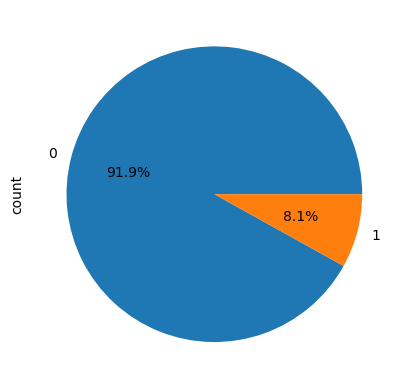

In [13]:
perc_target = df.TARGET.sum() / len(df.TARGET)
print(f'Percentage Target = 1 are {perc_target*100} %')
df['TARGET'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.plot()

# Melihat total value
list(df['TARGET'].value_counts().values)


From the chart it can be seen that 8.1% or 24825 clients fail to pay debts, while 91.9% or 282686 people can pay debts on time

# Bab 5: Feature Engineering

At this stage I will select the features contained in the dataset to be used in creating the model. These features will have their data dimensions reduced or developed if deemed necessary, then they will be exploited by using them in various techniques.

## Data Cleaning

In [14]:
# Calculate missing value
miss_val = df.isnull().sum().sort_values(ascending = False)
miss_val_prcnt = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
miss_app_train  = pd.concat([miss_val, miss_val_prcnt], axis=1, keys=['Total Mising Value', 'Percentage'])
miss_app_train.head(20)

,Total Mising Value,Percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


Then I will see the number of duplicate data

In [15]:
# Counts the number of duplicate data
df.duplicated().sum()

0

There is no duplicate data, lets continue to check the distribution class of TARGET

In [16]:
df['TARGET'].value_counts()


TARGET
0    282686
1     24825
Name: count, dtype: int64

the TARGET class is imbalance, then we check the anomalies

In [17]:

df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Delete the anomalies by replace with nan 

In [18]:
df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
df['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

## Feature Selection

In [19]:
# Create a label encoder object
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
objList = df.select_dtypes(include = "object").columns
le = LabelEncoder()
for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))
df = df.fillna(0)
    
print(df.head())

   SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   1            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         3510

# Handling data imbalance

Random over-sampling:
TARGET
1    282686
0    282686
Name: count, dtype: int64


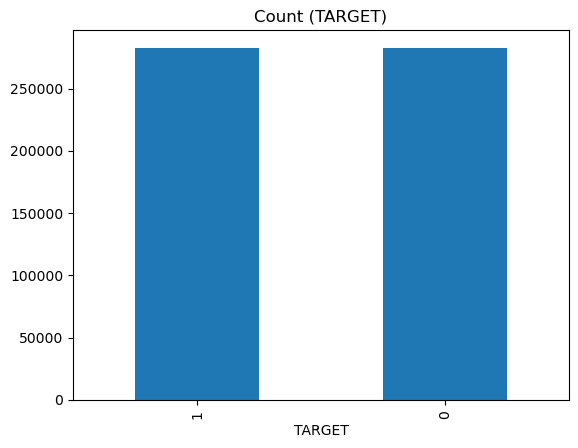

In [20]:
# Class count
count_class_0, count_class_1 = df.TARGET.value_counts()

# Divide class
df_class_0 = df[df['TARGET'] == 0]
df_class_1 = df[df['TARGET'] == 1]

df_class_1_up = df_class_1.sample(count_class_0, replace=True)
df_oversampling = pd.concat([df_class_1_up, df_class_0], axis=0)

print('Random over-sampling:')
print(df_oversampling.TARGET.value_counts())

df_oversampling.TARGET.value_counts().plot(kind='bar', title='Count (TARGET)');

## Splitting Data

In [21]:
target = df_oversampling['TARGET']
ft_train = df_oversampling.drop('TARGET', axis=1)

X_train, X_test, y_train, y_test = train_test_split(ft_train, target, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(452297, 121) (113075, 121)


In [22]:
# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Repeat with the scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (452297, 121)
Testing data shape:  (113075, 121)


# Bab 6: Model Definition



In [23]:
log_model = LogisticRegression()
knn_model = KNeighborsClassifier()
ranfor_model = RandomForestClassifier()


# Bab 7: Model Training

### Logistic Regression

In [24]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Melihat skor dari pipeline terhadap X_test dan y_test
log_model.score(X_test, y_test)

0.6540879946937873

###  KNN

In [26]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
knn_model.score(X_test, y_test)

0.8716427150121601

### Cross Validation between Model

In this section I will carry out Cross Validation between the 3 models above with the number of splits = 5 with the final result being precision score. Metrics Precision was chosen because I prefer to be more concerned with detecting as many customers as possible who are truly unable to pay

In [28]:
# Define SKfold
skfold = StratifiedKFold(n_splits=5)

In [29]:
# Define Cross Validation for each model
cv_log_model = cross_val_score(log_model, X_train, y_train, cv=skfold, scoring = 'precision')
cv_knn_model = cross_val_score(knn_model, X_train, y_train, cv=skfold, scoring = 'precision')


In [30]:
# find best model based on Cross_Val_score (mean)
name_model = []
cv_scores=0

for cv,name in zip([cv_log_model, cv_knn_model],
                   ['log_model','knn_model']):

    # create output looping
    print(name)
    print('precision score - ALL - Cross Validation:', cv)
    print('precision score - Mean - Cross Validation:', cv.mean())
    print('precision score - std - Cross Validation:', cv.std())
    print('precision score - Range of Test Set:', (cv.mean()-cv.std()), '-', (cv.mean()+cv.std()))
    print('-'*50)

    # create condition to find the best model based on cv.Mean()
    if  cv.mean() > cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass

# Display the result
print('Best Model:',name_model)
print('Cross val mean from best model:', cv_scores)


log_model
precision score - ALL - Cross Validation: [0.67007661 0.66925059 0.66836973 0.67140572 0.6681249 ]
precision score - Mean - Cross Validation: 0.6694455104891803
precision score - std - Cross Validation: 0.0011983347228031107
precision score - Range of Test Set: 0.6682471757663773 - 0.6706438452119834
--------------------------------------------------
knn_model
precision score - ALL - Cross Validation: [0.77324444 0.77152633 0.76947878 0.7713639  0.76957953]
precision score - Mean - Cross Validation: 0.7710385967091737
precision score - std - Cross Validation: 0.0013979495788819726
precision score - Range of Test Set: 0.7696406471302918 - 0.7724365462880557
--------------------------------------------------
Best Model: knn_model
Cross val mean from best model: 0.7710385967091737


From the cross validation results, the best model is the knn_model or K-Nearest Neighbors model with a mean of 0.77

# Bab 8: Model Evaluation

At this stage, the KNN model will be assessed whether it works well or not. The evaluation will use several metrics, namely f1 score, precision, accuracy and recall. But the main metric is the precision score, since we want to predict as many customer who unable to pay and avoid give them the loan.

precision - Test Set   :  0.7975045269352649
recall - Test Set   :  0.9964648071552303
accuracy - Test Set   :  0.8716427150121601
F1 Score - Test Set   :  0.885951815938772 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.75      0.85     56501
           1       0.80      1.00      0.89     56574

    accuracy                           0.87    113075
   macro avg       0.90      0.87      0.87    113075
weighted avg       0.90      0.87      0.87    113075
 

Confusion Matrix      : 


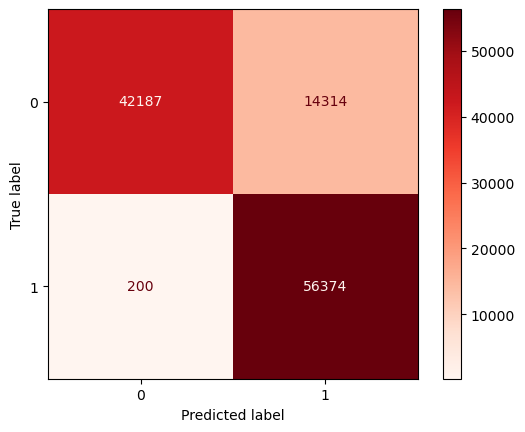

In [31]:
y_pred_test = knn_model.predict(X_test)

print('precision - Test Set   : ', precision_score(y_test, y_pred_test))
print('recall - Test Set   : ', recall_score(y_test, y_pred_test))
print('accuracy - Test Set   : ', accuracy_score(y_test, y_pred_test))
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test, cmap='Reds'))

# Bab 9: Conclusion

From a business perspective, insights that can be drawn from the analysis:
- Since employees in HR, IT and real estate have high acceptance rate, create a special campaign for this three occupation type to generate more clients.
- Create an advertise or discount to interest among businessmen, students, and HR Staff to apply for loans.
- Identifying and predicting clients who cant pay helps companies to manage credit risk more effectively.
- Individually adjusted credit limits can help reduce the risk of creditors while retaining good customers.
